## <center> Data Mining & Machine Learning Evaluation : A Scraped dataset about cars from wandaloo


#### <center> Done by :<b>Asmae ELAZRAK & Riad ELHAJJAJI & Haidara Moulay Touhami </b>

## SUD CLOUD & IOT- INE2

2022 - 2023


## Part 1: Data preprocessing


In [157]:
# The first step :importing all librairies we will use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.style import use
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Let's get to know our dataset


In [158]:
# Read in the dataset using simple `pandas`
cars_dataset = pd.read_csv('wandaloo_cars.csv')

In [159]:
cars_dataset

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,VOLVO,XC90,NaN,630.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3125,VOLVO,XC90,NaN,730.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3126,VOLVO,XC90,NaN,850.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3127,VOLVO,XC90,NaN,1.000.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,11 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,- l/100 km,- l/100 km,230 km/h,71 litre


#### To get a better understanding of DataFrames and diagnose potential data problems we prints just the header of a DataFrame


In [160]:
# Print the header of the DataFrame
cars_dataset.head(15)

,Brand,Model,Version,Price,Modèle,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C 2014,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C 2003,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B 2013,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E 2006,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé 2014,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
5,MERCEDES,Classe E 2010,250 CDI BlueEfficiency Classic,150.000 DH VENDUE,2010.0,Seconde,169.950 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
6,MERCEDES,Classe E 2016,220 d DCT Luxury,580.000 DH,2016.0,Seconde,18.000 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
7,MERCEDES,Classe C 2013,200 d Avantgarde +,228.000 DH,2013.0,Première,155.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
8,MERCEDES,GLA 2017,200 d Urban,290.000 DH VENDUE,2017.0,Première,67.271 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
9,MERCEDES,CLA Coupé 2014,200 CDI,240.000 DH,2014.0,Seconde,87.000 km,Diesel,Manuelle,6 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
# Print data types of DataFrame
cars_dataset.dtypes

Brand                                    object
Model                                    object
Version                                  object
Price                                    object
Modèle                                  float64
Main                                     object
Kilométrage                              object
Carburant                                object
Transmision                              object
Puissance fiscale                        object
Couleur extérieure                       object
Etat du véhicule                         object
Climatisation                            object
Vitres électriques                       object
Sièges électriques                       object
Ordinateur de bord                       object
Start & Stop                             object
Régulateur de vitesse                    object
Allumage auto. des feux                  object
Détecteur de pluie                       object
Commandes au volant                     

In [162]:
# Printing the data types confirms that there is a lot of columns need to be converted to `float`such  Vitesse maxi.  , Volume du réservoir 

In [163]:
# Print info of DataFrame
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3063 non-null   object 
 1   Model                                 3063 non-null   object 
 2   Version                               2180 non-null   object 
 3   Price                                 3063 non-null   object 
 4   Modèle                                2180 non-null   float64
 5   Main                                  2180 non-null   object 
 6   Kilométrage                           2180 non-null   object 
 7   Carburant                             2166 non-null   object 
 8   Transmision                           2180 non-null   object 
 9   Puissance fiscale                     3048 non-null   object 
 10  Couleur extérieure                    2180 non-null   object 
 11  Etat du véhicule 

In [164]:
# Printing the info confirms that there is missing data in the `Architecture`, `Antipatinage`, `Cylindréeh`

In [165]:
cars_dataset.shape

(3129, 43)

In [166]:
cars_dataset.describe()

,Modèle
count,2180.000000
mean,2012.002294
std,5.407446
min,1984.000000
25%,2009.000000
50%,2013.000000
75%,2016.000000
max,2022.000000


In [167]:
# Print number of missing values
cars_dataset.isna().sum()

Brand                                     66
Model                                     66
Version                                  949
Price                                     66
Modèle                                   949
Main                                     949
Kilométrage                              949
Carburant                                963
Transmision                              949
Puissance fiscale                         81
Couleur extérieure                       949
Etat du véhicule                         949
Climatisation                             81
Vitres électriques                        81
Sièges électriques                       101
Ordinateur de bord                        81
Start & Stop                              81
Régulateur de vitesse                     81
Allumage auto. des feux                   81
Détecteur de pluie                        81
Commandes au volant                       81
Ecran tactile                             81
Rétroviseu

In [168]:
# Rename column 'Modèle' to 'Year' to keep the year for this column and leave the model just for gender without the year
cars_dataset = cars_dataset.rename(columns={'Modèle': 'Year'})

In [169]:
# Import Lib
import re

# Convert 'Model' column to string
cars_dataset['Model'] = cars_dataset['Model'].astype(str)

# Remove all numbers after 20 
pattern = r"(?:(?<=^)|(?<=[^0-9]))((1[0-9])|[2-9]|[0-9]{3,})(?=$|[^0-9])"
cars_dataset['Model'] = cars_dataset['Model'].apply(lambda x: re.sub(pattern, "", x))

# Remove 20
cars_dataset['Model'] = cars_dataset['Model'].replace("20", "")
cars_dataset['Model']

0        Classe C 
1        Classe C 
2        Classe B 
3        Classe E 
4       CLA Coupé 
           ...    
3124          XC90
3125          XC90
3126          XC90
3127          XC90
3128          XC90
Name: Model, Length: 3129, dtype: object

In [170]:
# Drop rows with all missing values  
cars_dataset.dropna(how='all', inplace=True)
cars_dataset

,Brand,Model,Version,Price,Year,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C,220 d,228.000 DH,2014.0,Seconde,144.500 km,Diesel,Automatique,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C,220 CDI,79.000 DH,2003.0,Seconde,350.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B,180 d Urban,150.000 DH,2013.0,Seconde,144.000 km,Diesel,Manuelle,8 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E,Autre version,135.000 DH,2006.0,Seconde,248.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé,220 CDI,240.000 DH,2014.0,Seconde,103.000 km,Diesel,Automatique,9 cv,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,VOLVO,XC90,NaN,630.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3125,VOLVO,XC90,NaN,730.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3126,VOLVO,XC90,NaN,850.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,8 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,"6,3 l/100 km","5,4 l/100 km",220 km/h,71 litre
3127,VOLVO,XC90,NaN,1.000.000 DH * * Prix public,NaN,NaN,NaN,NaN,NaN,11 cv,...,7.0,oui,oui,oui,4 cylindres,1.969 cm³,- l/100 km,- l/100 km,230 km/h,71 litre


#### Let's convert all the columns that need to be converted to floats


In [171]:
# Remove DH from price before conversion to float
cars_dataset['Price'] = cars_dataset['Price'].str.strip("DH VENDUE")
# Print header to make sure change was done
cars_dataset['Price']

0                              228.000
1                               79.000
2                              150.000
3                              135.000
4                              240.000
                     ...              
3124      630.000 DH *   * Prix public
3125      730.000 DH *   * Prix public
3126      850.000 DH *   * Prix public
3127    1.000.000 DH *   * Prix public
3128    1.100.000 DH *   * Prix public
Name: Price, Length: 3129, dtype: object

In [172]:
# Convert price to float
cars_dataset['Price'] = cars_dataset['Price'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Price'] = cars_dataset['Price'].astype('float')
cars_dataset['Price']

0        228000.0
1         79000.0
2        150000.0
3        135000.0
4        240000.0
          ...    
3124     630000.0
3125     730000.0
3126     850000.0
3127    1000000.0
3128    1100000.0
Name: Price, Length: 3129, dtype: float64

In [173]:
# SO now we can calculate mean of price  and use it in missing value
MP=cars_dataset['Price'].mean()
MP

269213.4142997062

In [174]:
# Remove Km from kilométrage before conversion to float
cars_dataset['Kilométrage'] = cars_dataset['Kilométrage'].str.strip("km")
# Print header to make sure change was done
cars_dataset['Kilométrage']

0       144.500 
1       350.000 
2       144.000 
3       248.000 
4       103.000 
          ...   
3124         NaN
3125         NaN
3126         NaN
3127         NaN
3128         NaN
Name: Kilométrage, Length: 3129, dtype: object

In [175]:
# Convert kilométrage to float
cars_dataset['Kilométrage'] = cars_dataset['Kilométrage'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Kilométrage'] = cars_dataset['Kilométrage'].astype('float')
cars_dataset['Kilométrage']

0       144500.0
1       350000.0
2       144000.0
3       248000.0
4       103000.0
          ...   
3124         NaN
3125         NaN
3126         NaN
3127         NaN
3128         NaN
Name: Kilométrage, Length: 3129, dtype: float64

In [176]:
# SO now we can calculate mean of Kilométrage  and use it in missing value
MK=cars_dataset['Kilométrage'].mean()
MK

148788.91880733945

In [177]:
# Remove cv from Puissance fiscale before conversion to float
cars_dataset['Puissance fiscale'] = cars_dataset['Puissance fiscale'].str.strip("cv")
# Print header to make sure change was done
cars_dataset['Puissance fiscale']

0        8 
1        8 
2        8 
3        9 
4        9 
       ... 
3124     8 
3125     8 
3126     8 
3127    11 
3128    11 
Name: Puissance fiscale, Length: 3129, dtype: object

In [178]:
# Convert Puissance fiscal to float
cars_dataset['Puissance fiscale'] = cars_dataset['Puissance fiscale'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Puissance fiscale'] = cars_dataset['Puissance fiscale'].replace('', 'NAN') # replace empty strings with NaN
cars_dataset['Puissance fiscale'] = cars_dataset['Puissance fiscale'].astype('float')
cars_dataset['Puissance fiscale']

0        8.0
1        8.0
2        8.0
3        9.0
4        9.0
        ... 
3124     8.0
3125     8.0
3126     8.0
3127    11.0
3128    11.0
Name: Puissance fiscale, Length: 3129, dtype: float64

In [179]:
# SO now we can calculate mean of Puissance fiscal and use it in missing value
MF=cars_dataset['Puissance fiscale'].mean()
MF

8.294203426904849

In [180]:
# Remove cm³  from Volume du réservoire before conversion to float
cars_dataset['Cylindrée'] = cars_dataset['Cylindrée'].str.strip("cm³")
# Print header to make sure change was done
cars_dataset['Cylindrée']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
3124    1.969 
3125    1.969 
3126    1.969 
3127    1.969 
3128    1.969 
Name: Cylindrée, Length: 3129, dtype: object

In [181]:
# Convert Cylindrée  to float
cars_dataset['Cylindrée'] = cars_dataset['Cylindrée'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Cylindrée'] = cars_dataset['Cylindrée'].replace('', 'NAN') # replace empty strings with NaN
cars_dataset['Cylindrée'] = cars_dataset['Cylindrée'].astype('float')
cars_dataset['Cylindrée']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
3124    1969.0
3125    1969.0
3126    1969.0
3127    1969.0
3128    1969.0
Name: Cylindrée, Length: 3129, dtype: float64

In [182]:
# Remove l/100 km  from Conso. ville and Conso. route  before conversion to float
cars_dataset['Conso. ville'] = cars_dataset['Conso. ville'].str.strip("l/100 km")
cars_dataset['Conso. route'] = cars_dataset['Conso. route'].str.strip("l/100 km")
# Print header to make sure change was done
cars_dataset['Conso. ville']
cars_dataset['Conso. route']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3124    5,4
3125    5,4
3126    5,4
3127      -
3128      -
Name: Conso. route, Length: 3129, dtype: object

In [183]:
# Convert Conso. ville  to float
cars_dataset['Conso. ville'] = cars_dataset['Conso. ville'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Conso. ville'] = cars_dataset['Conso. ville'].replace('', 'NAN') # replace empty strings with NaN
cars_dataset['Conso. ville'] = cars_dataset['Conso. ville'].astype('float')
cars_dataset['Conso. ville']

# Convert Conso. route  to float
cars_dataset['Conso. route'] = cars_dataset['Conso. route'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Conso. route'] = cars_dataset['Conso. route'].replace('', 'NAN') # replace empty strings with NaN
cars_dataset['Conso. route'] = cars_dataset['Conso. route'].astype('float')
cars_dataset['Conso. route']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3124    54.0
3125    54.0
3126    54.0
3127     NaN
3128     NaN
Name: Conso. route, Length: 3129, dtype: float64

In [184]:
# Remove Km/l  from Vitesse maxi. before conversion to float
cars_dataset['Vitesse maxi.'] = cars_dataset['Vitesse maxi.'].str.strip("km/l")
# Print header to make sure change was done
cars_dataset['Vitesse maxi.']

# Convert Volume du réservoir  to float
cars_dataset['Vitesse maxi.'] = cars_dataset['Vitesse maxi.'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Vitesse maxi.'] = cars_dataset['Vitesse maxi.'].replace('', 'NAN') # replace empty strings with NaN
cars_dataset['Vitesse maxi.'] = cars_dataset['Vitesse maxi.'].astype('float')
cars_dataset['Vitesse maxi.']


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
3124    220.0
3125    220.0
3126    220.0
3127    230.0
3128    230.0
Name: Vitesse maxi., Length: 3129, dtype: float64

In [185]:
# Remove litre  from Volume du réservoire before conversion to float
cars_dataset['Volume du réservoir'] = cars_dataset['Volume du réservoir'].str.strip("litre")
# Print header to make sure change was done
cars_dataset['Volume du réservoir']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3124    71 
3125    71 
3126    71 
3127    71 
3128    71 
Name: Volume du réservoir, Length: 3129, dtype: object

In [186]:
# Convert Volume du réservoir  to float
cars_dataset['Volume du réservoir'] = cars_dataset['Volume du réservoir'].replace('[^0-9]', '', regex=True) # remove periods
cars_dataset['Volume du réservoir'] = cars_dataset['Volume du réservoir'].replace('', 'NAN') # replace empty strings with NaN
cars_dataset['Volume du réservoir'] = cars_dataset['Volume du réservoir'].astype('float')
cars_dataset['Volume du réservoir']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
3124    71.0
3125    71.0
3126    71.0
3127    71.0
3128    71.0
Name: Volume du réservoir, Length: 3129, dtype: float64

#### Let's replace any invalid values like ("-") with other symbole


In [187]:
cars_dataset['Couleur extérieure'].head(18)

0      Gris foncé
1            Noir
2            Noir
3      Gris clair
4     Blanc cassé
5            Gris
6            Noir
7            Gris
8            Noir
9           Blanc
10           Gris
11          Blanc
12           Noir
13     Gris clair
14     Bleu foncé
15           Noir
16              -
17           Gris
Name: Couleur extérieure, dtype: object

In [188]:
#We replace any invalid values like ("-") with Autre couleur using the replace() method
cars_dataset["Couleur extérieure"].replace("-", "Autre couleur", inplace=True)
cars_dataset['Couleur extérieure'].head(18)

0        Gris foncé
1              Noir
2              Noir
3        Gris clair
4       Blanc cassé
5              Gris
6              Noir
7              Gris
8              Noir
9             Blanc
10             Gris
11            Blanc
12             Noir
13       Gris clair
14       Bleu foncé
15             Noir
16    Autre couleur
17             Gris
Name: Couleur extérieure, dtype: object

In [189]:
cars_dataset['Etat du véhicule'].head(50)

0        Très bon
1        Très bon
2     Comme neuve
3     Comme neuve
4       Excellent
5        Très bon
6     Comme neuve
7     Comme neuve
8     Comme neuve
9        Très bon
10      Excellent
11    Comme neuve
12      Excellent
13      Excellent
14            Bon
15      Excellent
16              -
17       Très bon
18    Comme neuve
19    Comme neuve
20      Excellent
21      Excellent
22      Excellent
23      Excellent
24    Comme neuve
25            Bon
26      Excellent
27            Bon
28       Très bon
29      Excellent
30      Excellent
31      Excellent
32      Excellent
33        Correct
34    Comme neuve
35       Très bon
36    Comme neuve
37      Excellent
38    Comme neuve
39      Excellent
40       Très bon
41    Comme neuve
42      Excellent
43      Excellent
44      Excellent
45      Excellent
46    Comme neuve
47       Très bon
48            NaN
49      Excellent
Name: Etat du véhicule, dtype: object

In [190]:
#We replace any missing or invalid values like ("-") with Autre couleur using the replace() method
cars_dataset["Etat du véhicule"].replace("-", "NAN", inplace=True)
cars_dataset['Etat du véhicule'].head(18)

0        Très bon
1        Très bon
2     Comme neuve
3     Comme neuve
4       Excellent
5        Très bon
6     Comme neuve
7     Comme neuve
8     Comme neuve
9        Très bon
10      Excellent
11    Comme neuve
12      Excellent
13      Excellent
14            Bon
15      Excellent
16            NAN
17       Très bon
Name: Etat du véhicule, dtype: object

In [191]:
cars_dataset['Vitres électriques'].head(50)

0     Electrique AV/AR
1     Electrique AV/AR
2     Electrique AV/AR
3     Electrique AV/AR
4     Electrique AV/AR
5     Electrique AV/AR
6     Electrique AV/AR
7     Electrique AV/AR
8     Electrique AV/AR
9     Electrique AV/AR
10    Electrique AV/AR
11    Electrique AV/AR
12    Electrique AV/AR
13    Electrique AV/AR
14       Electrique AV
15    Electrique AV/AR
16                   -
17    Electrique AV/AR
18    Electrique AV/AR
19    Electrique AV/AR
20                   -
21    Electrique AV/AR
22    Electrique AV/AR
23    Electrique AV/AR
24    Electrique AV/AR
25                   -
26    Electrique AV/AR
27    Electrique AV/AR
28       Electrique AV
29    Electrique AV/AR
30    Electrique AV/AR
31    Electrique AV/AR
32                   -
33       Electrique AV
34    Electrique AV/AR
35    Electrique AV/AR
36       Electrique AV
37    Electrique AV/AR
38    Electrique AV/AR
39    Electrique AV/AR
40    Electrique AV/AR
41    Electrique AV/AR
42    Electrique AV/AR
43    Elect

In [192]:
#We replace any missing or invalid values like ("-") with Autre couleur using the replace() method
cars_dataset["Vitres électriques"].replace("-", "NAN", inplace=True)
cars_dataset['Vitres électriques'].head(18)

0     Electrique AV/AR
1     Electrique AV/AR
2     Electrique AV/AR
3     Electrique AV/AR
4     Electrique AV/AR
5     Electrique AV/AR
6     Electrique AV/AR
7     Electrique AV/AR
8     Electrique AV/AR
9     Electrique AV/AR
10    Electrique AV/AR
11    Electrique AV/AR
12    Electrique AV/AR
13    Electrique AV/AR
14       Electrique AV
15    Electrique AV/AR
16                 NAN
17    Electrique AV/AR
Name: Vitres électriques, dtype: object

#### Missing values


In [193]:
# Print number of missing values
cars_dataset.isna().sum()

Brand                                     66
Model                                      0
Version                                  949
Price                                     66
Year                                     949
Main                                     949
Kilométrage                              949
Carburant                                963
Transmision                              949
Puissance fiscale                        386
Couleur extérieure                       949
Etat du véhicule                         949
Climatisation                             81
Vitres électriques                        81
Sièges électriques                       101
Ordinateur de bord                        81
Start & Stop                              81
Régulateur de vitesse                     81
Allumage auto. des feux                   81
Détecteur de pluie                        81
Commandes au volant                       81
Ecran tactile                             81
Rétroviseu

In [194]:
#Brand is the most important raw so we will remove any empty columns 
cars_dataset.dropna(subset=['Brand'], inplace=True)
cars_dataset

,Brand,Model,Version,Price,Year,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C,220 d,228000.0,2014.0,Seconde,144500.0,Diesel,Automatique,8.0,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
1,MERCEDES,Classe C,220 CDI,79000.0,2003.0,Seconde,350000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
2,MERCEDES,Classe B,180 d Urban,150000.0,2013.0,Seconde,144000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
3,MERCEDES,Classe E,Autre version,135000.0,2006.0,Seconde,248000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
4,MERCEDES,CLA Coupé,220 CDI,240000.0,2014.0,Seconde,103000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,VOLVO,XC90,NaN,630000.0,NaN,NaN,NaN,NaN,NaN,8.0,...,7.0,oui,oui,oui,4 cylindres,1969.0,63.0,54.0,220.0,71.0
3125,VOLVO,XC90,NaN,730000.0,NaN,NaN,NaN,NaN,NaN,8.0,...,7.0,oui,oui,oui,4 cylindres,1969.0,63.0,54.0,220.0,71.0
3126,VOLVO,XC90,NaN,850000.0,NaN,NaN,NaN,NaN,NaN,8.0,...,7.0,oui,oui,oui,4 cylindres,1969.0,63.0,54.0,220.0,71.0
3127,VOLVO,XC90,NaN,1000000.0,NaN,NaN,NaN,NaN,NaN,11.0,...,7.0,oui,oui,oui,4 cylindres,1969.0,NaN,NaN,230.0,71.0


In [195]:
cars_dataset.isna().sum()

Brand                                      0
Model                                      0
Version                                  883
Price                                      0
Year                                     883
Main                                     883
Kilométrage                              883
Carburant                                897
Transmision                              883
Puissance fiscale                        320
Couleur extérieure                       883
Etat du véhicule                         883
Climatisation                             15
Vitres électriques                        15
Sièges électriques                        35
Ordinateur de bord                        15
Start & Stop                              15
Régulateur de vitesse                     15
Allumage auto. des feux                   15
Détecteur de pluie                        15
Commandes au volant                       15
Ecran tactile                             15
Rétroviseu

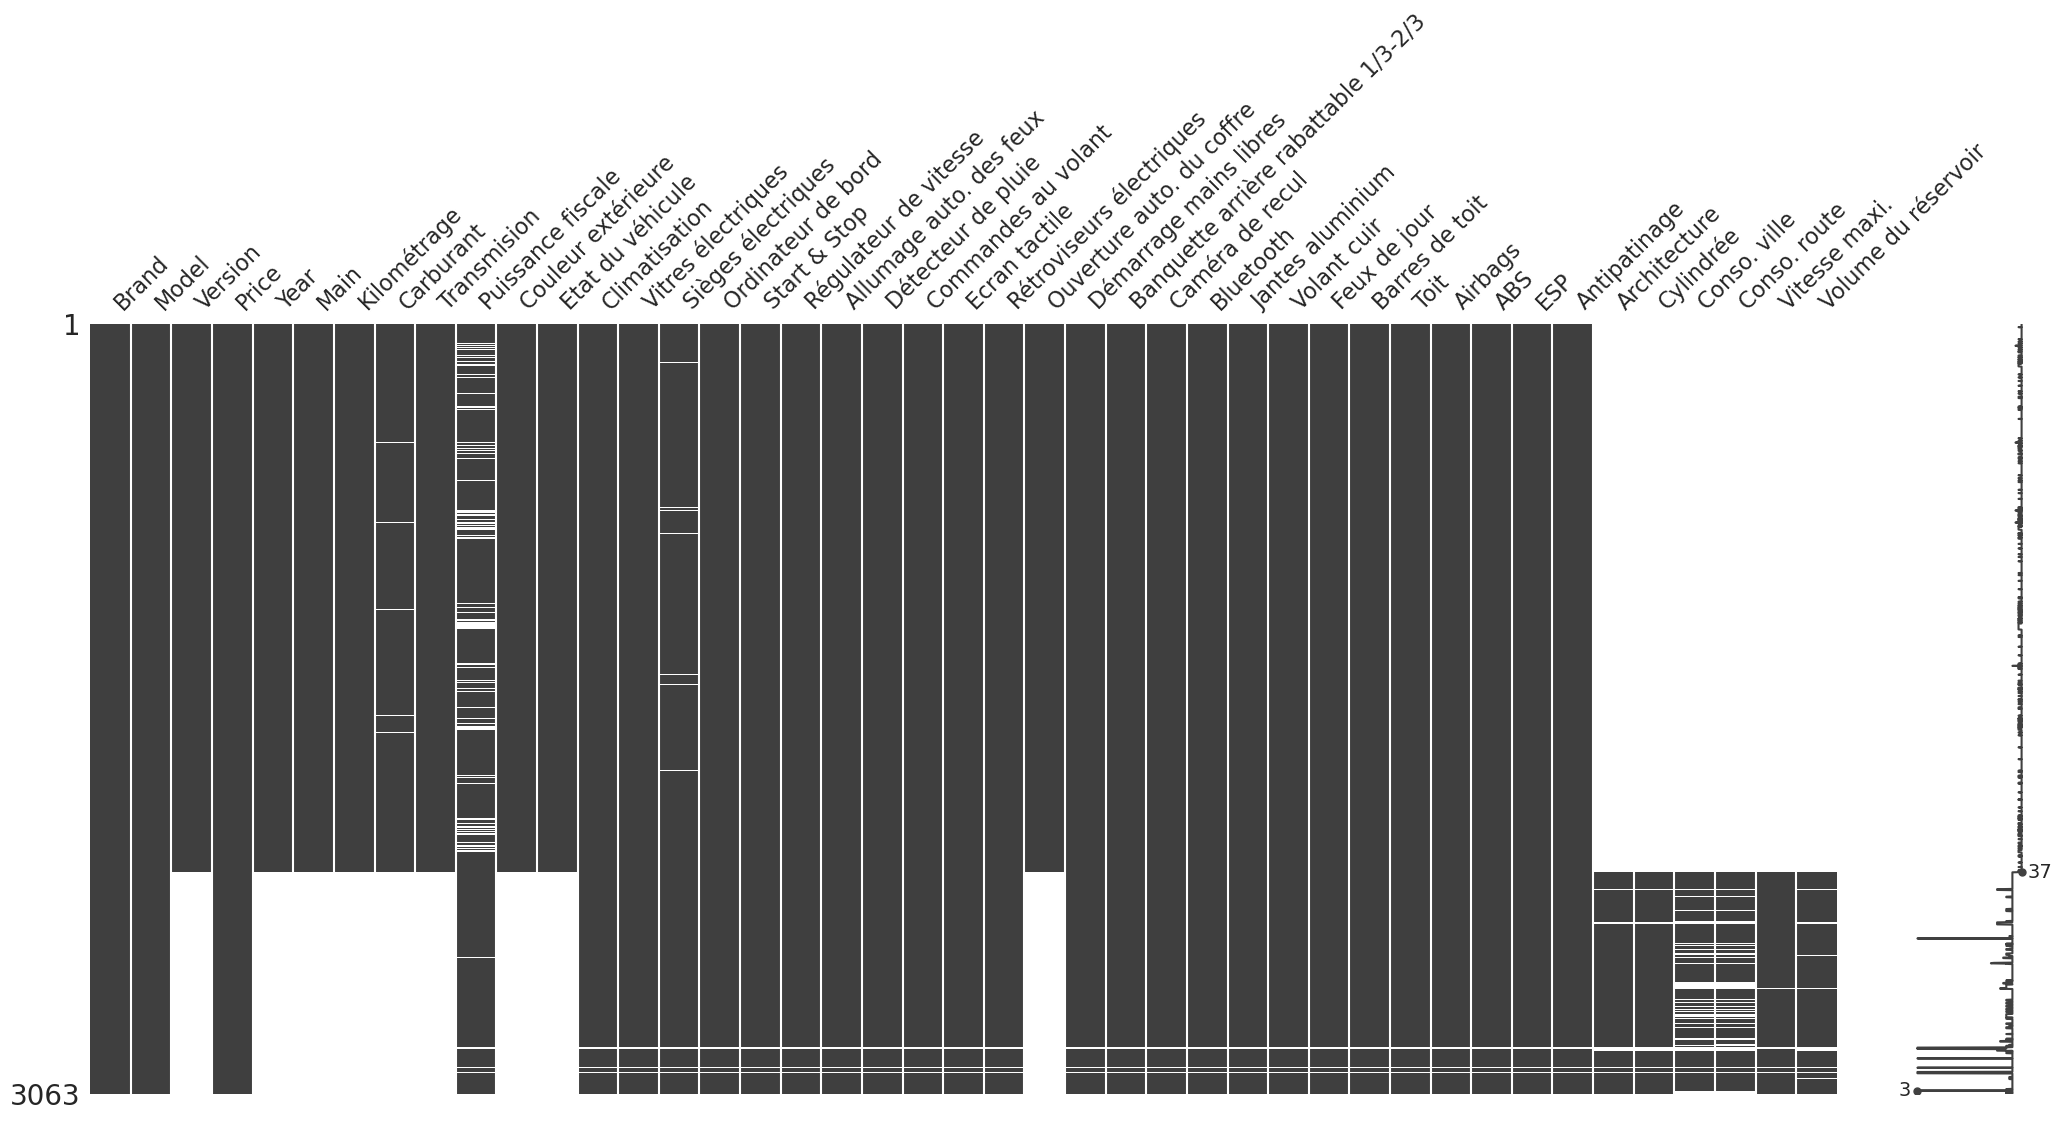

In [196]:
# Visualize the missingness 
import missingno as msno
msno.matrix(cars_dataset)
plt.show()

We are going to perform mean value imputation for all numerical features and frequent occurring value for categorical features.


#### Let's deal with numerical features first


In [197]:
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 0 to 3128
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3063 non-null   object 
 1   Model                                 3063 non-null   object 
 2   Version                               2180 non-null   object 
 3   Price                                 3063 non-null   float64
 4   Year                                  2180 non-null   float64
 5   Main                                  2180 non-null   object 
 6   Kilométrage                           2180 non-null   float64
 7   Carburant                             2166 non-null   object 
 8   Transmision                           2180 non-null   object 
 9   Puissance fiscale                     2743 non-null   float64
 10  Couleur extérieure                    2180 non-null   object 
 11  Etat du véhicule 

In [198]:
# replace the null value with the mean of the column
columns = ['Kilométrage',
           'Cylindrée',
           'Conso. ville',
           'Conso. route',
           'Volume du réservoir',
           'Price',
           'Puissance fiscale',
           'Vitesse maxi.']

for col in columns :
    cars_dataset[col].fillna(cars_dataset[col].mean(), inplace=True)  

In [199]:
cars_dataset.isna().sum()

Brand                                      0
Model                                      0
Version                                  883
Price                                      0
Year                                     883
Main                                     883
Kilométrage                                0
Carburant                                897
Transmision                              883
Puissance fiscale                          0
Couleur extérieure                       883
Etat du véhicule                         883
Climatisation                             15
Vitres électriques                        15
Sièges électriques                        35
Ordinateur de bord                        15
Start & Stop                              15
Régulateur de vitesse                     15
Allumage auto. des feux                   15
Détecteur de pluie                        15
Commandes au volant                       15
Ecran tactile                             15
Rétroviseu

#### Now the categorical features.


In [200]:
# replace the null value with the most occurring value 
# mode() function returns a list of the most frequent value in a col
columns = ['Model',
           'Version',
          'Year',
          'Main',
          'Carburant',
          'Transmision',
          'Couleur extérieure',
          'Airbags',
          'ABS',
          'ESP',
          'Antipatinage',
          'Barres de toit',
          'Toit',
          'Feux de jour',
          'Volant cuir',
          'Jantes aluminium',
          'Bluetooth',
          'Caméra de recul',
          'Banquette arrière rabattable 1/3-2/3',
          'Démarrage mains libres',
          'Ouverture auto. du coffre',
          'Rétroviseurs électriques',
          'Ecran tactile',
          'Commandes au volant',
          'Détecteur de pluie',
          'Allumage auto. des feux',
          'Régulateur de vitesse',
          'Start & Stop',
          'Ordinateur de bord',
          'Sièges électriques',
          'Vitres électriques',
          'Climatisation',
          'Etat du véhicule',
           'Architecture']

for col in columns :
    cars_dataset[col].fillna(cars_dataset[col].mode().iloc[0], inplace=True)  

In [201]:
cars_dataset.isna().sum()

Brand                                   0
Model                                   0
Version                                 0
Price                                   0
Year                                    0
Main                                    0
Kilométrage                             0
Carburant                               0
Transmision                             0
Puissance fiscale                       0
Couleur extérieure                      0
Etat du véhicule                        0
Climatisation                           0
Vitres électriques                      0
Sièges électriques                      0
Ordinateur de bord                      0
Start & Stop                            0
Régulateur de vitesse                   0
Allumage auto. des feux                 0
Détecteur de pluie                      0
Commandes au volant                     0
Ecran tactile                           0
Rétroviseurs électriques                0
Ouverture auto. du coffre         

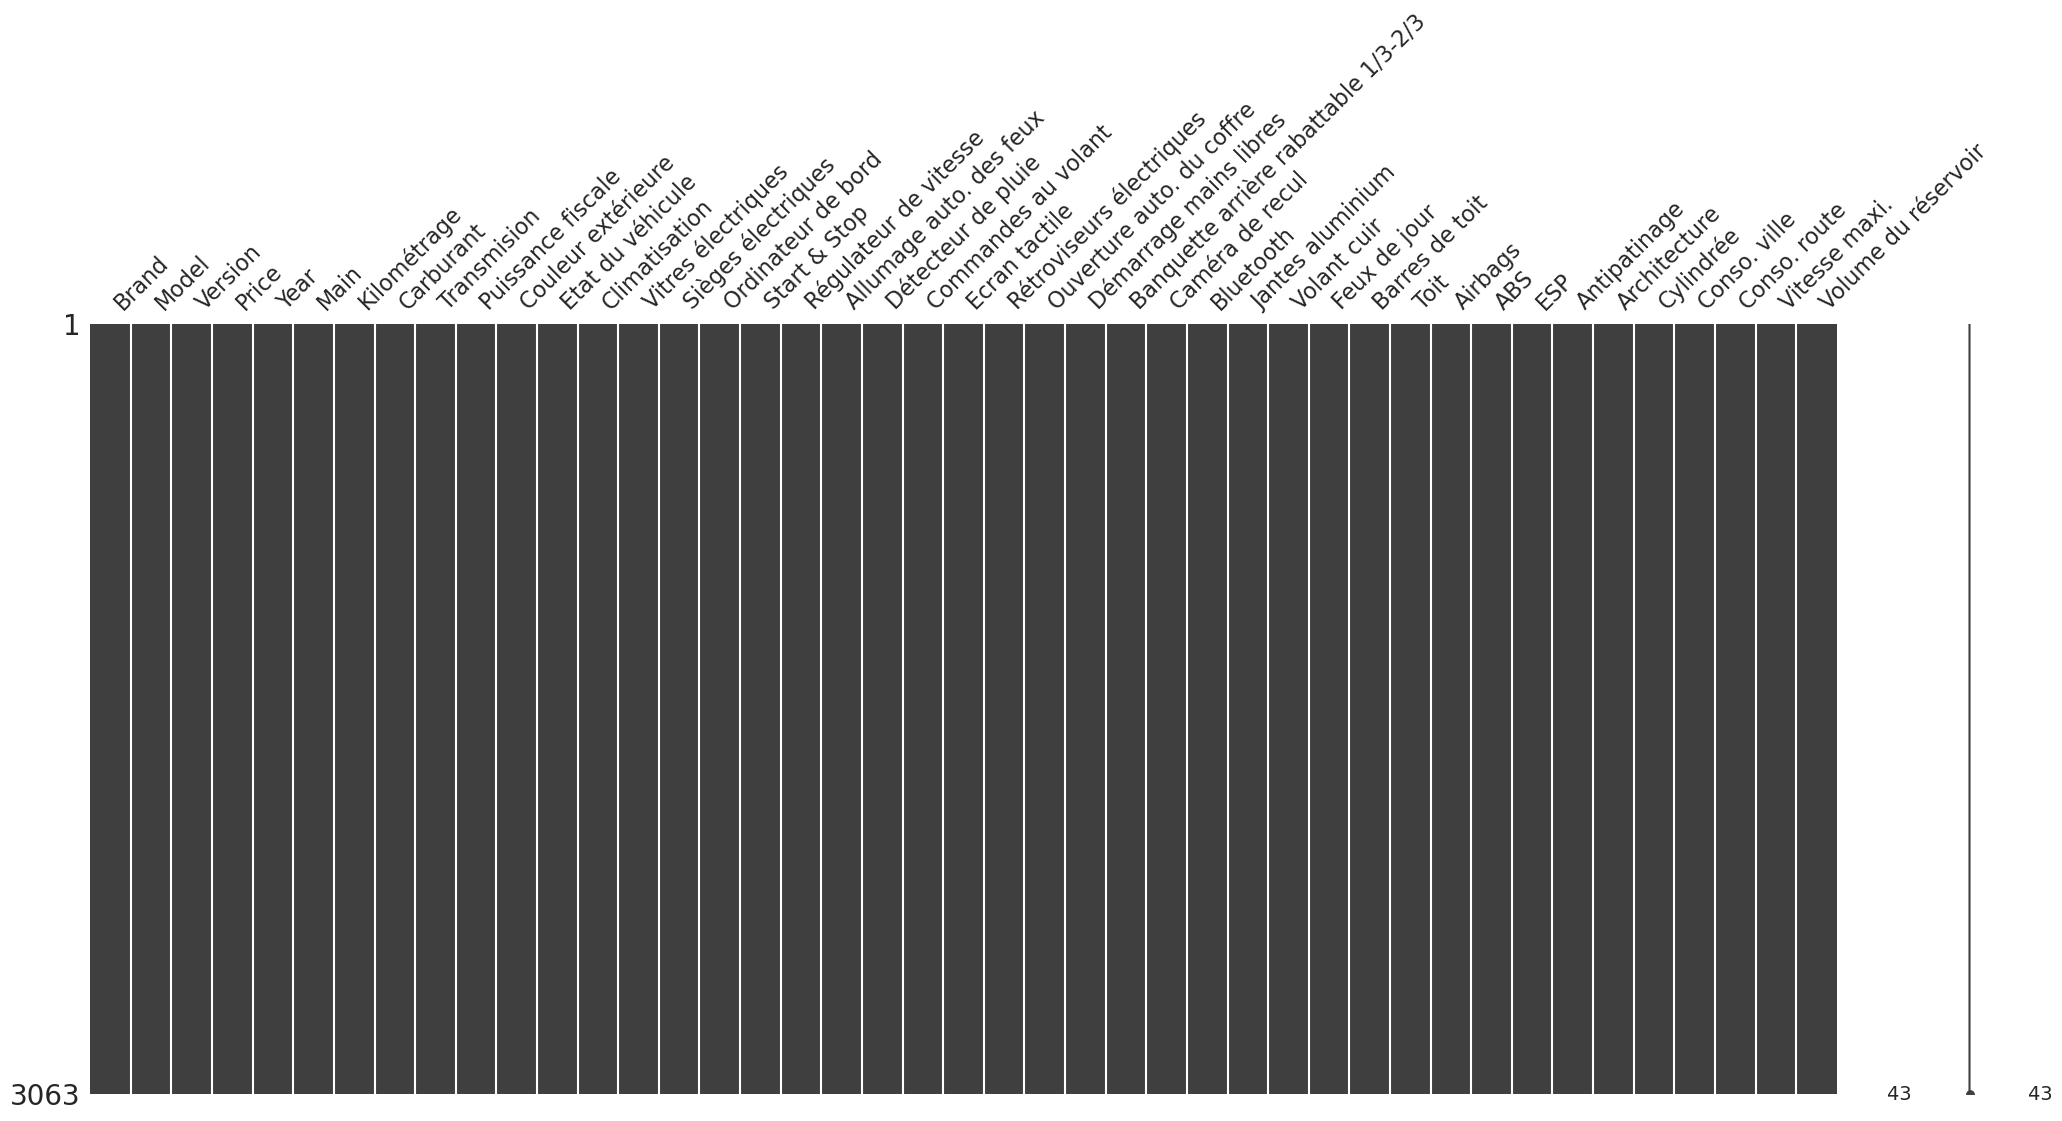

In [202]:
# Visualize the missingness 
import missingno as msno
msno.matrix(cars_dataset)
plt.show()

#### No more missing values !


## Part 2: Data visualization and exploration.


### `Analyse générale du jeu de données`


In [203]:
cars_dataset.head()

,Brand,Model,Version,Price,Year,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C,220 d,228000.0,2014.0,Seconde,144500.0,Diesel,Automatique,8.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
1,MERCEDES,Classe C,220 CDI,79000.0,2003.0,Seconde,350000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
2,MERCEDES,Classe B,180 d Urban,150000.0,2013.0,Seconde,144000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
3,MERCEDES,Classe E,Autre version,135000.0,2006.0,Seconde,248000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
4,MERCEDES,CLA Coupé,220 CDI,240000.0,2014.0,Seconde,103000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228


In [204]:
print(f'Nombre de ligne : {cars_dataset.shape[0]}')
print(f'Nombre de Colonne : {cars_dataset.shape[1]}')

Nombre de ligne : 3063
Nombre de Colonne : 43


In [205]:
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 0 to 3128
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 3063 non-null   object 
 1   Model                                 3063 non-null   object 
 2   Version                               3063 non-null   object 
 3   Price                                 3063 non-null   float64
 4   Year                                  3063 non-null   float64
 5   Main                                  3063 non-null   object 
 6   Kilométrage                           3063 non-null   float64
 7   Carburant                             3063 non-null   object 
 8   Transmision                           3063 non-null   object 
 9   Puissance fiscale                     3063 non-null   float64
 10  Couleur extérieure                    3063 non-null   object 
 11  Etat du véhicule 

In [206]:
cars_dataset.describe()

,Price,Year,Kilométrage,Puissance fiscale,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
count,3.063000e+03,3063.000000,3.063000e+03,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000
mean,2.692134e+05,2013.731309,1.487889e+05,8.294203,2004.078107,52.625520,41.377437,208.546729,57.662228
std,5.126661e+05,5.309551,3.318008e+05,4.587903,330.863006,12.854139,9.480233,16.685453,7.087739
min,0.000000e+00,1984.000000,0.000000e+00,1.000000,998.000000,2.000000,2.000000,45.000000,35.000000
25%,9.500000e+04,2011.000000,8.999950e+04,6.000000,2004.078107,52.625520,41.377437,208.546729,57.662228
50%,1.470000e+05,2016.000000,1.487889e+05,8.000000,2004.078107,52.625520,41.377437,208.546729,57.662228
75%,2.800000e+05,2018.000000,1.550000e+05,8.294203,2004.078107,52.625520,41.377437,208.546729,57.662228
max,2.200000e+07,2022.000000,1.678000e+07,95.000000,5980.000000,207.000000,98.000000,330.000000,104.000000


### `Les variables numériques`


In [207]:
### Numerical variables
numeric_variables=['Price',
                   'Kilométrage',
                   'Puissance fiscale',
                   'Cylindrée',
                   'Conso. ville',
                   'Conso. route',
                   'Vitesse maxi.',
                   'Volume du réservoir']

cars_dataset[numeric_variables].head()

,Price,Kilométrage,Puissance fiscale,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,228000.0,144500.0,8.0,2004.078107,52.62552,41.377437,208.546729,57.662228
1,79000.0,350000.0,8.0,2004.078107,52.62552,41.377437,208.546729,57.662228
2,150000.0,144000.0,8.0,2004.078107,52.62552,41.377437,208.546729,57.662228
3,135000.0,248000.0,9.0,2004.078107,52.62552,41.377437,208.546729,57.662228
4,240000.0,103000.0,9.0,2004.078107,52.62552,41.377437,208.546729,57.662228


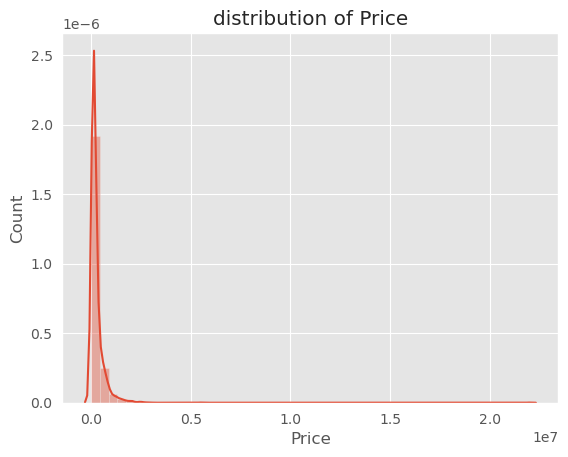

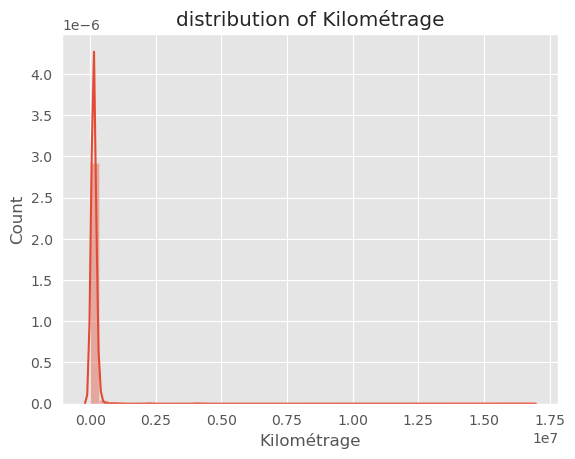

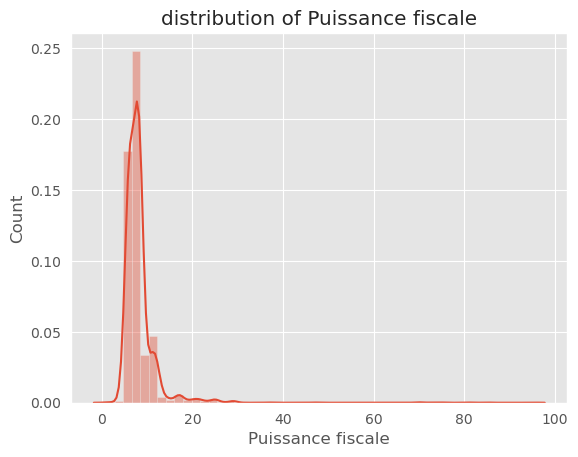

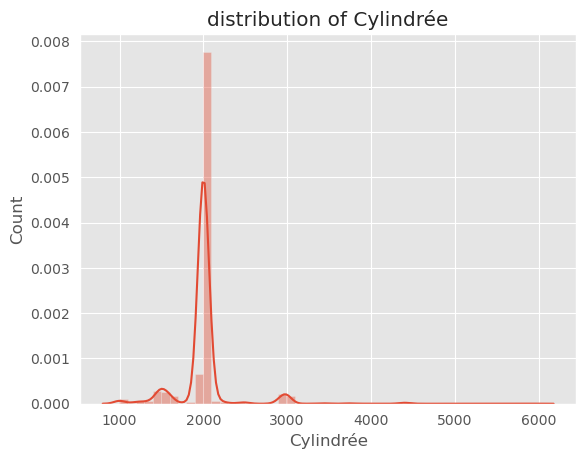

"\n# Pour le tracé de la distribution de chacune des quatres dernières variables numériques,\n#voir la cellule suivante.\n\n# Pour voir la distribution de toutes les variables numériques dans une seule cellule:\nfor variable in numeric_variables:\n    plot=sns.distplot(cars_dataset[variable])\n    plot.set(title=f'distribution of {variable}', xlabel=f'{variable}', ylabel='Count')\n    plt.show()\n"

In [208]:
# Histogramme 
# Tracé des quatres premières variables numériques pour voir leurs distributions.
use("ggplot")
for variable in numeric_variables[0:4]:
    plot=sns.distplot(cars_dataset[variable])
    plot.set(title=f'distribution of {variable}', xlabel=f'{variable}', ylabel='Count')
    plt.show()
    
'''
# Pour le tracé de la distribution de chacune des quatres dernières variables numériques,
#voir la cellule suivante.

# Pour voir la distribution de toutes les variables numériques dans une seule cellule:
for variable in numeric_variables:
    plot=sns.distplot(cars_dataset[variable])
    plot.set(title=f'distribution of {variable}', xlabel=f'{variable}', ylabel='Count')
    plt.show()
'''

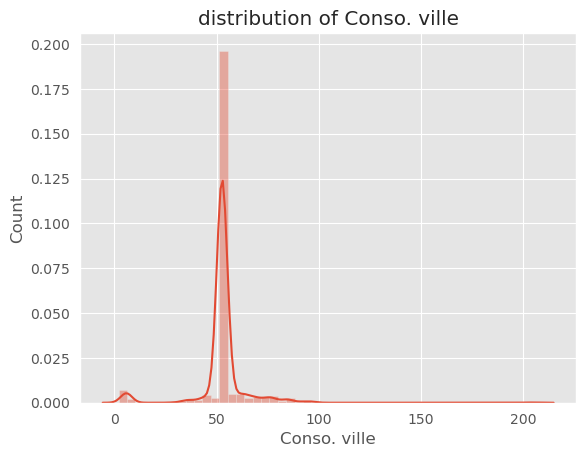

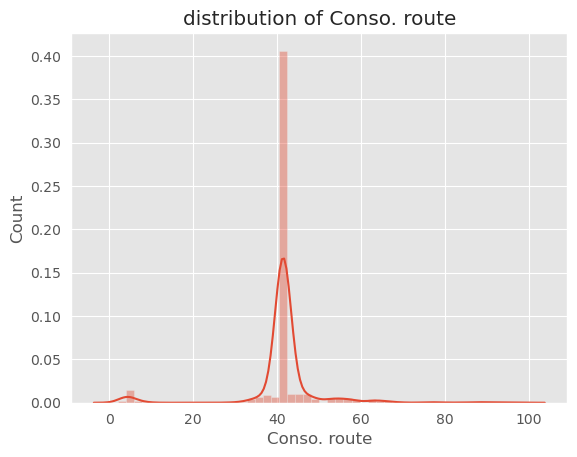

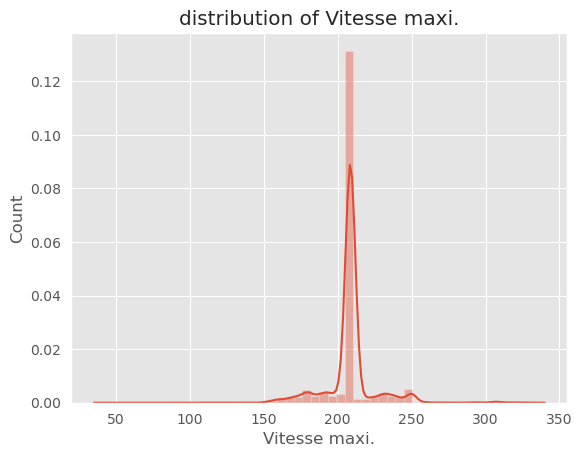

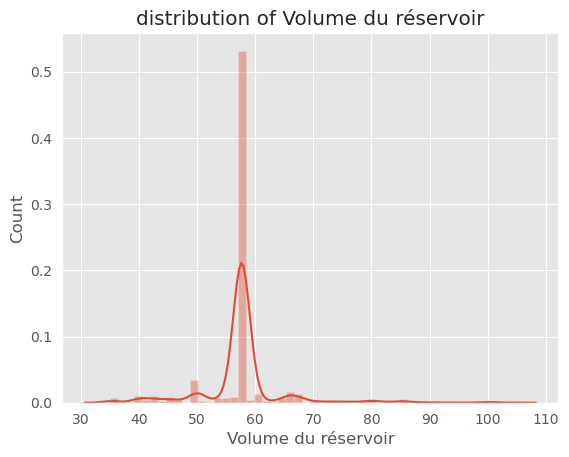

In [209]:
# Histogramme 
# Tracé de la distribution de chacune des quatres dernières variables numériques.
use("ggplot")
for variable in numeric_variables[4:8]:
    plot=sns.distplot(cars_dataset[variable])
    plot.set(title=f'distribution of {variable}', xlabel=f'{variable}', ylabel='Count')
    plt.show()

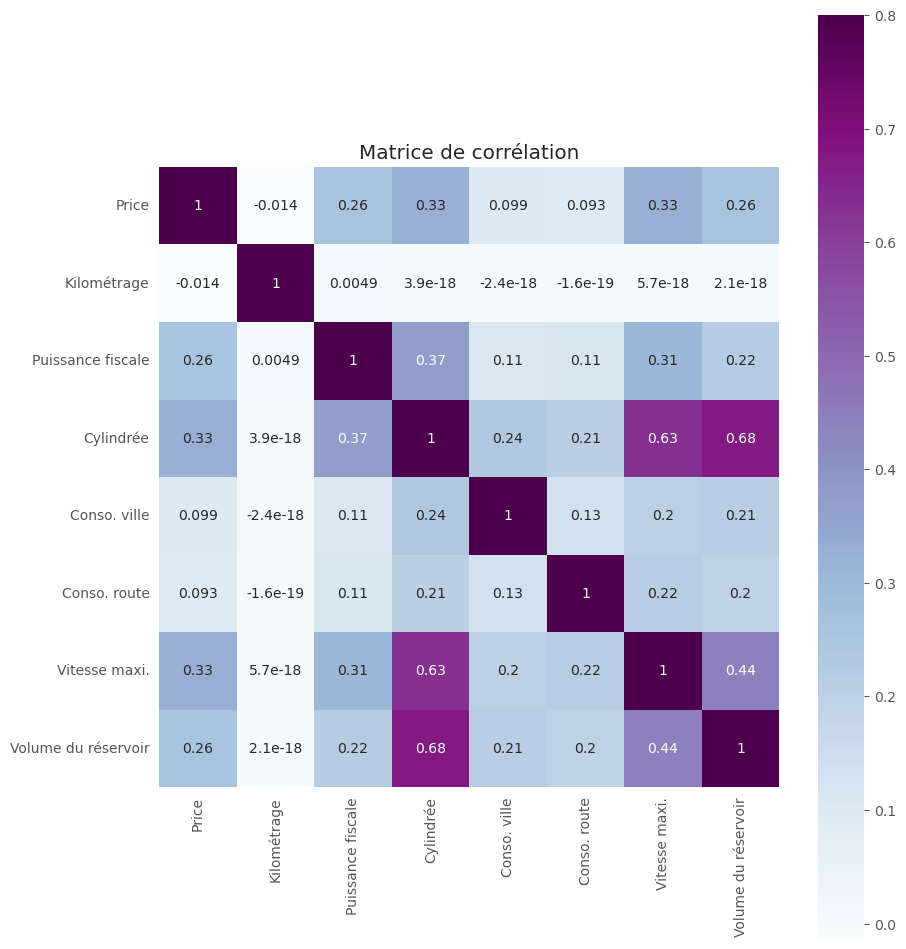

In [210]:
#Matrice de corrélation
matrix = cars_dataset[numeric_variables].corr()
f,ax=plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot=True)
plt.title('Matrice de corrélation')
plt.show()

#### Corrélation entre les variables

- Les variables `Vitesse maxi.` et `Cylindrée` présentent une `forte corrélation`.
- Les variables `Volume du réservoir` et `Cylindrée` présentent une `forte corrélation`.


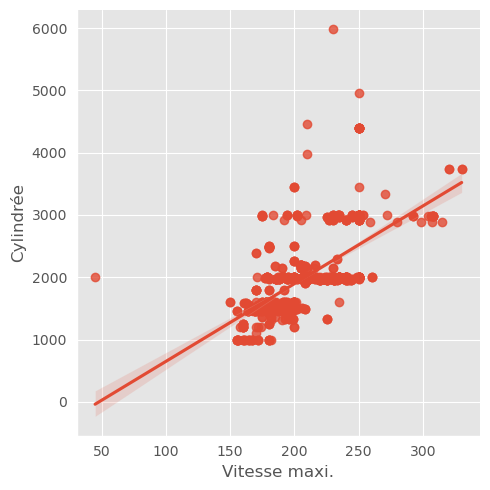

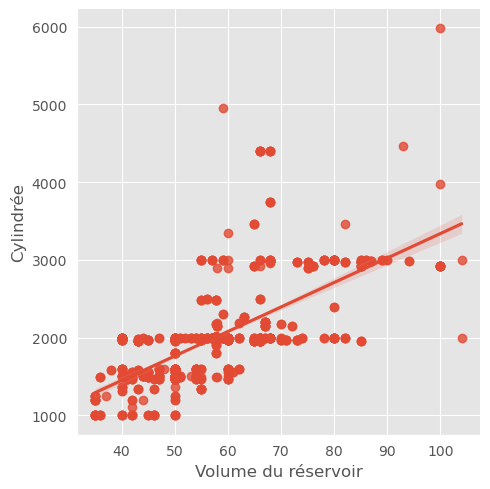

In [211]:
'''
Création d'un graphique de type "scatter plot" 
avec une ligne de régression linéaire. 

La méthode lmplot de Seaborn permet d'afficher un 
graphique de dispersion avec des points représentant 
les valeurs de "x" en fonction de "y". 

La ligne de régression linéaire va représenter la 
tendance globale des données. Cette ligne permet 
de visualiser si une corrélation linéaire existe 
entre les deux variables et de déterminer son intensité.

'''

# Pour x='Vitesse maxi.' et y='Cylindrée'
sns.lmplot(x="Vitesse maxi.",y="Cylindrée",data=cars_dataset)

# Pour x='Volume du réservoir', y='Cylindrée'
sns.lmplot(x="Volume du réservoir",y="Cylindrée",data=cars_dataset)

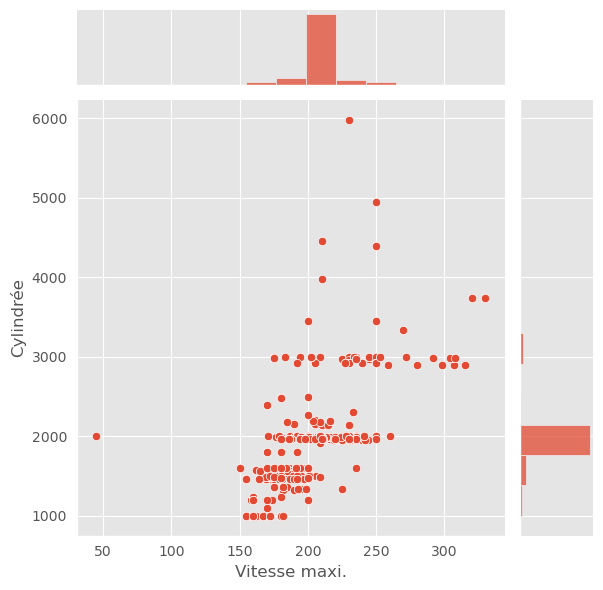

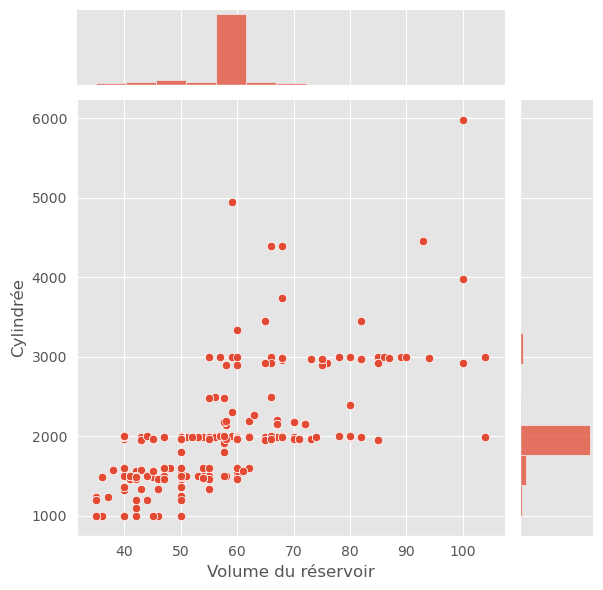

In [212]:
'''
Visualisation en utilisant la méthode jointplot de Seaborn pour déterminer la corrélation
entre deux variables x et y et la distribution de 
chaque variable.
'''

# Pour x='Vitesse maxi.' et y='Cylindrée'
j = sns.jointplot(data=cars_dataset, x='Vitesse maxi.', y='Cylindrée') 

# Pour x='Volume du réservoir', y='Cylindrée'
j = sns.jointplot(data=cars_dataset, x='Volume du réservoir', y='Cylindrée') 

### `Les variables catégoriques`


In [213]:
### Categorical variables
categorical_variables=cars_dataset.select_dtypes("object").columns
cars_dataset[categorical_variables].head()

,Brand,Model,Version,Main,Carburant,Transmision,Couleur extérieure,Etat du véhicule,Climatisation,Vitres électriques,...,Jantes aluminium,Volant cuir,Feux de jour,Barres de toit,Toit,Airbags,ABS,ESP,Antipatinage,Architecture
0,MERCEDES,Classe C,220 d,Seconde,Diesel,Automatique,Gris foncé,Très bon,auto. Bi-zone,Electrique AV/AR,...,oui,oui,oui,non,Rigide,oui,oui,oui,oui,4 cylindres
1,MERCEDES,Classe C,220 CDI,Seconde,Diesel,Manuelle,Noir,Très bon,auto.,Electrique AV/AR,...,oui,non,oui,non,Rigide,oui,oui,oui,oui,4 cylindres
2,MERCEDES,Classe B,180 d Urban,Seconde,Diesel,Manuelle,Noir,Comme neuve,manuelle,Electrique AV/AR,...,oui,oui,oui,non,Rigide,oui,oui,oui,oui,4 cylindres
3,MERCEDES,Classe E,Autre version,Seconde,Diesel,Automatique,Gris clair,Comme neuve,auto. Bi-zone,Electrique AV/AR,...,oui,non,oui,oui,Rigide,oui,oui,oui,oui,4 cylindres
4,MERCEDES,CLA Coupé,220 CDI,Seconde,Diesel,Automatique,Blanc cassé,Excellent,auto.,Electrique AV/AR,...,oui,non,oui,non,Panoramique,oui,oui,oui,oui,4 cylindres


In [214]:
# Observation des valeurs uniques de chaque feature categoriques.
for e in categorical_variables:
    print(f'\n Valeurs uniques pour la colonne => {e} :\n')
    print(f'{cars_dataset[categorical_variables][e].unique()} \n\n')


 Valeurs uniques pour la colonne => Brand :

['MERCEDES' 'MINI' 'MITSUBISHI' 'NISSAN' 'OPEL' 'PEUGEOT' 'PORSCHE'
 'RENAULT' 'SEAT' 'SKODA' 'SSANGYONG' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN'
 'VOLVO' 'ALFA' 'AUDI' 'BMW' 'CITROEN' 'DACIA' 'DFSK' 'DS' 'FIAT' 'FORD'
 'HONDA' 'HYUNDAI' 'JAGUAR' 'JEEP' 'KIA' 'LAND' 'LEXUS' 'MAHINDRA' 'MAZDA'] 



 Valeurs uniques pour la colonne => Model :

['Classe C ' 'Classe B ' 'Classe E ' 'CLA Coupé ' 'GLA ' 'GLE '
 'CLS Coupé ' 'CLK ' 'GLC Coupé ' 'Classe A ' ' ' 'Classe C Coupé ' 'GLK '
 'Citan ' 'Classe E Coupé ' 'Classe M ' 'Classe V ' 'Classe S '
 'SLS AMG Coupé ' 'Countryman ' ' portes ' 'Lancer ' 'L  ' 'Pajero Sport '
 'Pajero ' 'Outlander ' 'Lancer EX ' 'Colt ' 'Qashqai ' 'X-Trail ' 'Note '
 'Juke ' 'Micra ' 'Pathfinder ' 'Patrol ' 'Navara ' 'Evalia ' 'Sunny '
 'Vantage ' 'Insignia ' 'Astra ' 'Grandland X ' 'Corsa ' 'Astra Berline '
 'Crossland ' 'Adam ' 'Corsa Coupé ' 'Mokka ' 'Vectra ' 'Partner Tepee '
 'RCZ ' ' CC ' 'Partner ' 'LandTrek ' ' SW ' 'Bi

##### \* Utilisation des graphiques à barres pour afficher le nombre de valeurs uniques pour quelques features categoriques du jeu de données.


<AxesSubplot:title={'center':'Nombre de voitures par marque'}>

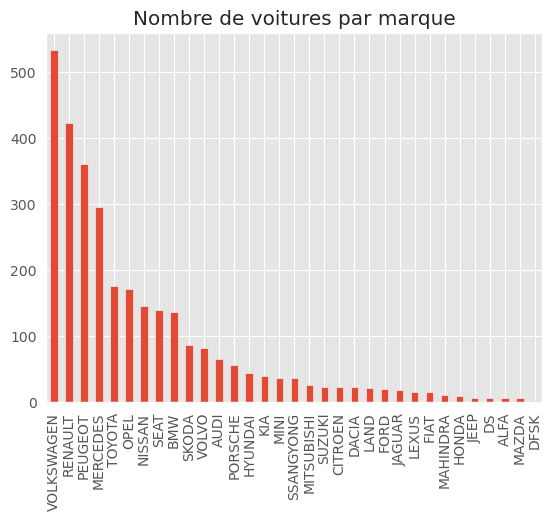

In [215]:
# Nombre de voitures par marque
cars_dataset['Brand'].value_counts().plot.bar(title = "Nombre de voitures par marque")

<AxesSubplot:title={'center':'Nombre de voitures par Couleur extérieure'}>

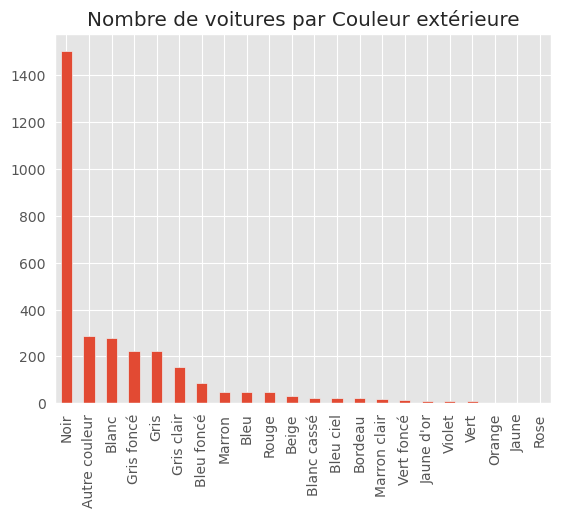

In [216]:
# Nombre de voitures par Couleur extérieure
cars_dataset['Couleur extérieure'].value_counts().plot.bar(title = "Nombre de voitures par Couleur extérieure")

<AxesSubplot:title={'center':'Nombre de voitures par Etat du véhicule'}>

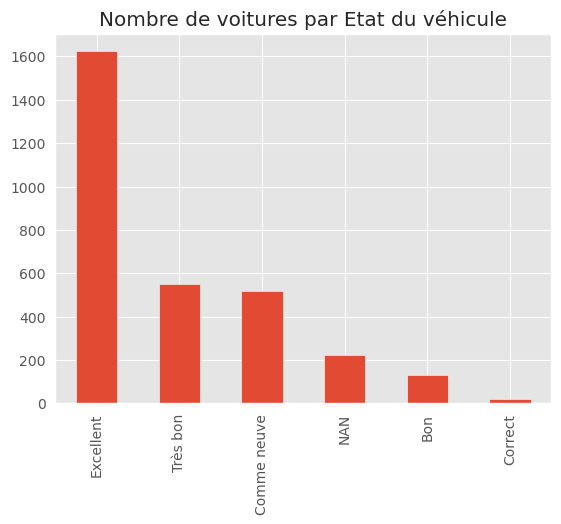

In [217]:
# Nombre de voitures par Etat du véhicule
cars_dataset['Etat du véhicule'].value_counts().plot.bar(title = "Nombre de voitures par Etat du véhicule")

<AxesSubplot:title={'center':'Nombre de voitures par type d´Architecture'}>

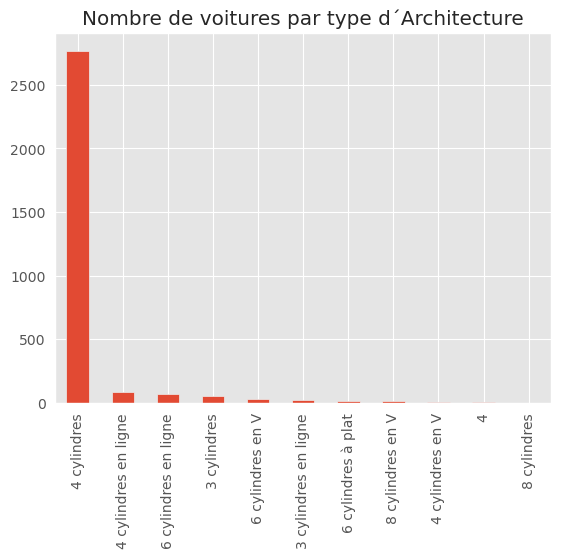

In [218]:
# Nombre de voitures par type d´Architecture
cars_dataset['Architecture'].value_counts().plot.bar(title = "Nombre de voitures par type d´Architecture")

[Text(0.5, 1.0, 'Nombre de voitures par type de Transmission')]

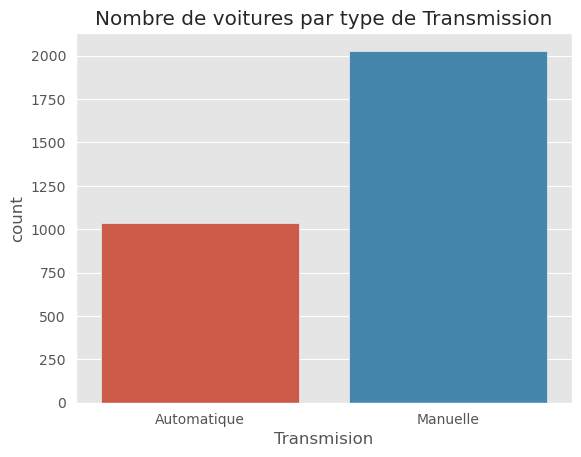

In [219]:
# Nombre de voitures par type de Transmission
sns.countplot(x="Transmision",data=cars_dataset).set(title='Nombre de voitures par type de Transmission')

[Text(0.5, 1.0, 'Nombre de voitures par type Carburant')]

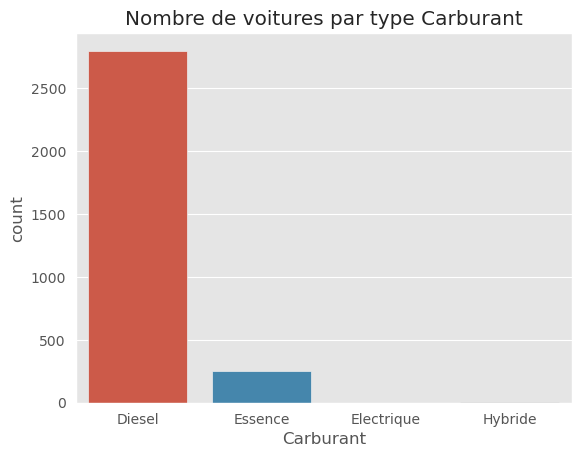

In [220]:
# Nombre de voitures par type de Carburant
sns.countplot(x="Carburant",data=cars_dataset).set(title='Nombre de voitures par type Carburant')

[Text(0.5, 1.0, 'Nombre de voitures ayant oui ou non un Ordinateur de bord')]

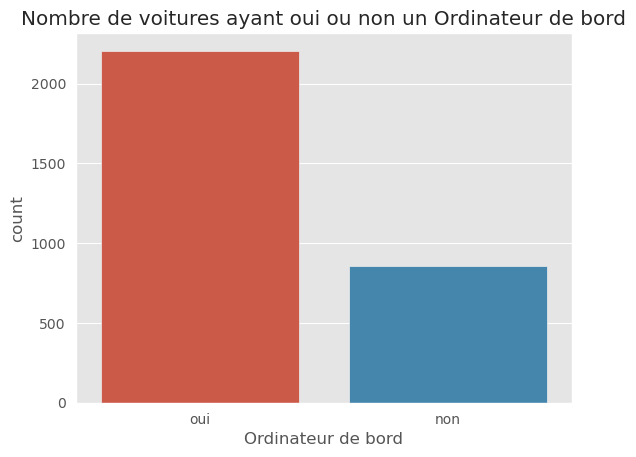

In [221]:
# Nombre de voitures ayant oui ou non un Ordinateur de bord
sns.countplot(x="Ordinateur de bord",data=cars_dataset).set(title='Nombre de voitures ayant oui ou non un Ordinateur de bord')

[Text(0.5, 1.0, 'Nombre de voitures ayant oui ou non une Caméra de recul')]

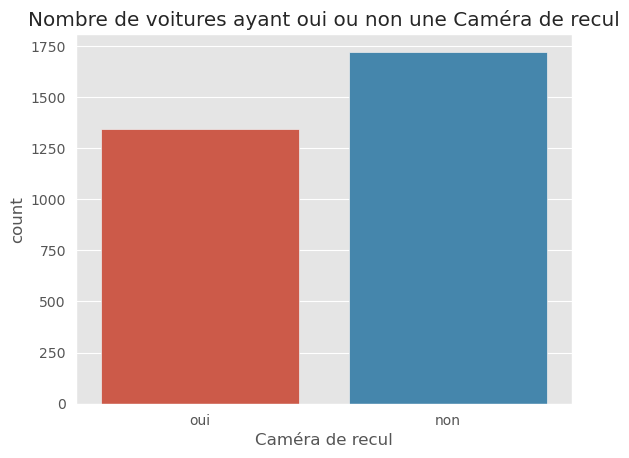

In [222]:
# Nombre de voitures ayant oui ou non une Caméra de recul
sns.countplot(x="Caméra de recul",data=cars_dataset).set(title='Nombre de voitures ayant oui ou non une Caméra de recul')

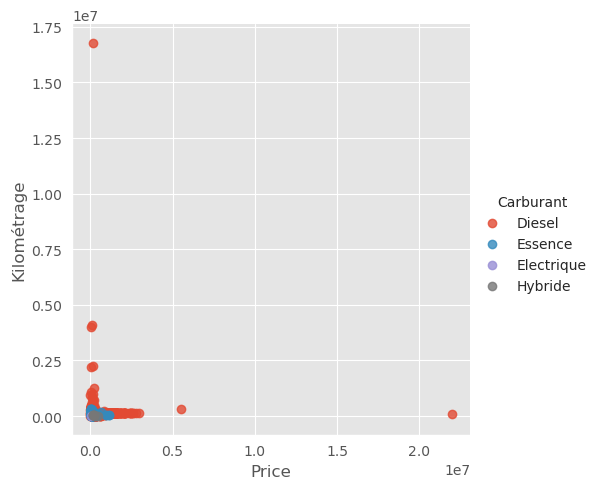

In [223]:
'''
Graphique de dispersion avec les variables 'Price' et 'Kilométrage' pour 
les axes x et y respectivement. Les points sont colorés selon la variable 'Carburant'.
'''
vis1= sns.lmplot(data=cars_dataset , x="Price",y="Kilométrage",fit_reg=False,hue="Carburant",aspect=1)

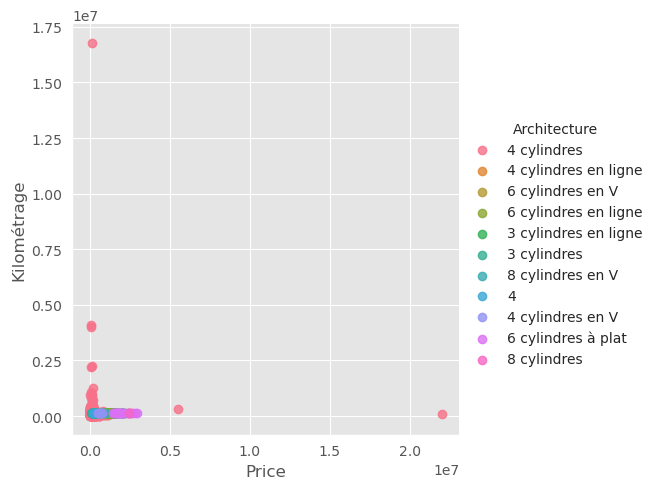

In [224]:
'''
Graphique de dispersion avec les variables 'Price' et 'Kilométrage' pour 
les axes x et y respectivement. Les points sont colorés selon la variable 'Architecture'.
'''
vis1= sns.lmplot(data=cars_dataset , x="Price",y="Kilométrage",fit_reg=False,hue="Architecture",aspect=1)

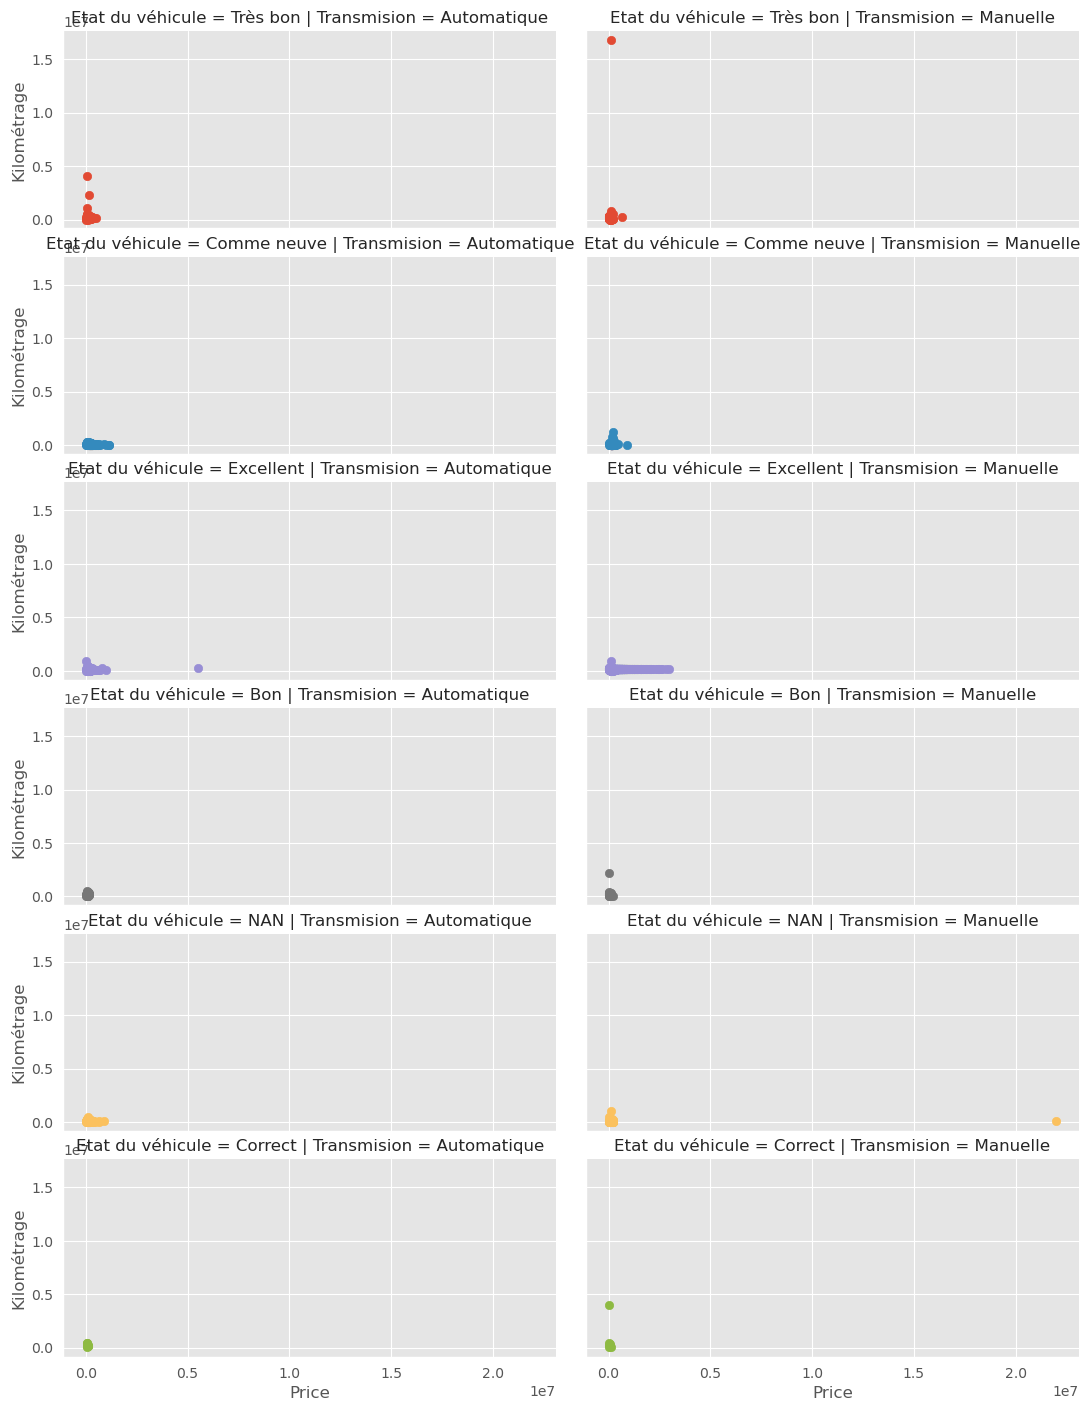

In [225]:
# Facet Grid
'''
Utilisation de la librairie seaborn pour créer un objet FacetGrid afin de représenter une 
grille de graphiques en fonction de deux variables : l état du véhicule et la transmission. 
Les points dans chaque graphique représentent la relation entre le prix et le kilométrage
pour les voitures de létat et de la transmission correspondants. 
La couleur de chaque point est déterminée par l'état du véhicule.
'''
g = sns.FacetGrid(cars_dataset, row='Etat du véhicule', col='Transmision',hue="Etat du véhicule") # we created grid to populate our figure in it
g = g.map(plt.scatter, 'Price','Kilométrage') #takes func , *arguments and it is used to populate our plot inside our facetgrid
#no need to specify the dataset name inside map fun because it is already has been specified in FacetGrid fun
g.fig.set_size_inches(12, 14)

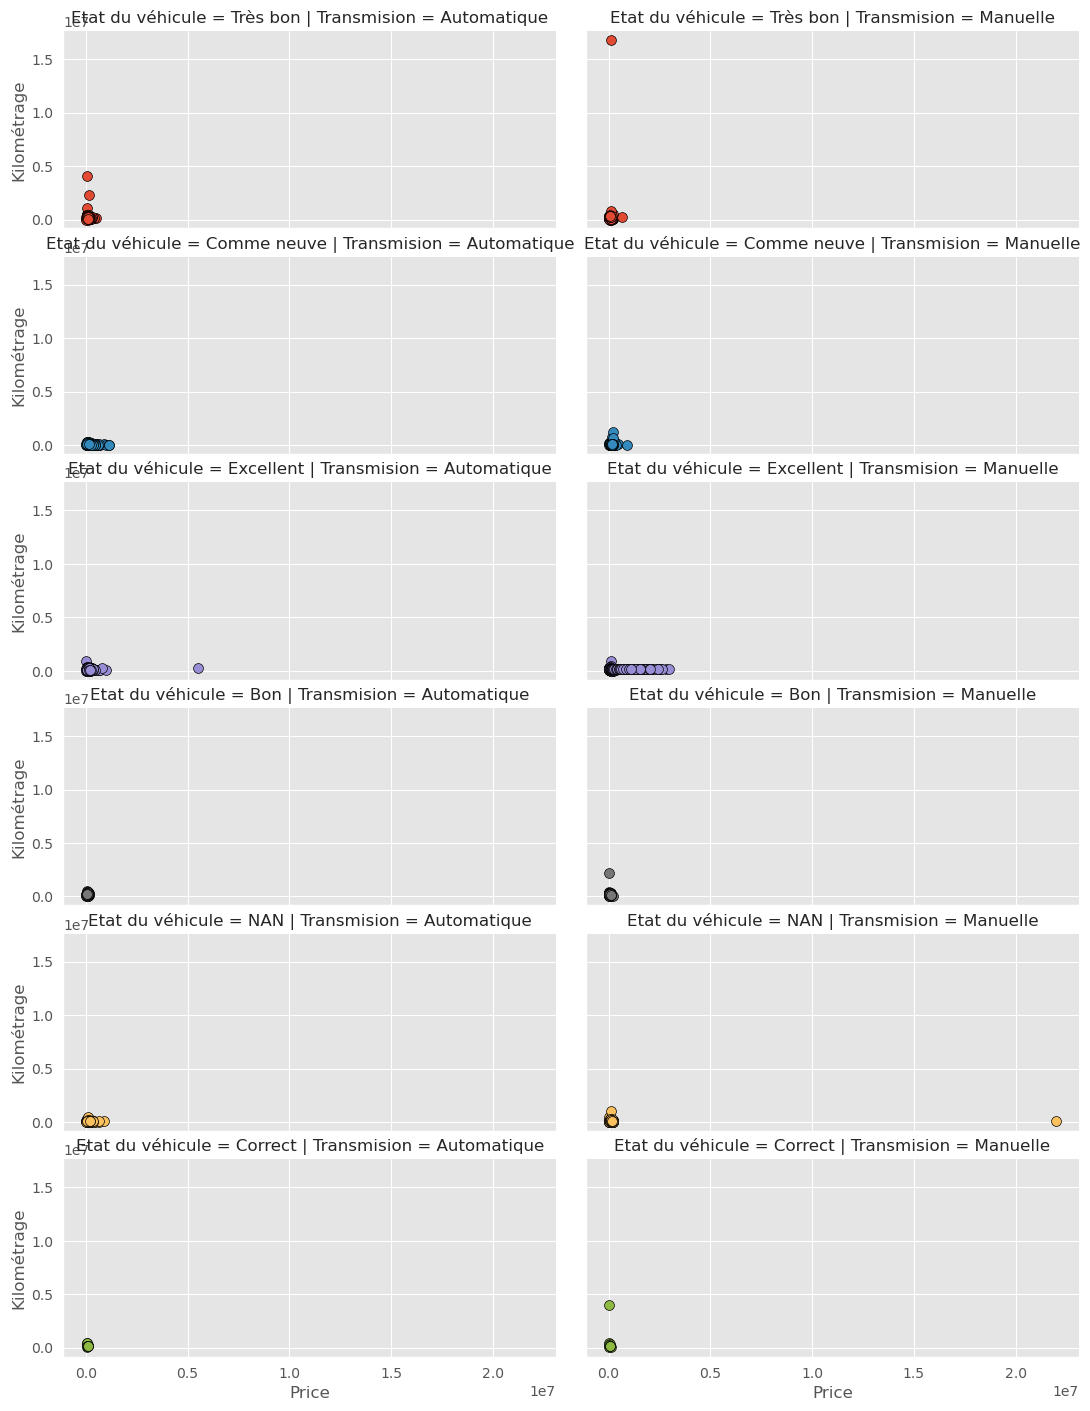

In [226]:
'''
Ici les paramètres s, linewidth et edgecolor sont utilisés pour personnaliser 
l'apparence des points dans les graphiques.
'''
g = sns.FacetGrid(cars_dataset, row='Etat du véhicule', col='Transmision',hue="Etat du véhicule")
kws = dict(s=50, linewidth = 0.5, edgecolor='black') # dictionary with keywords in order to make the plot more clear
g = g.map(plt.scatter,'Price','Kilométrage',**kws)
g.fig.set_size_inches(12, 14)

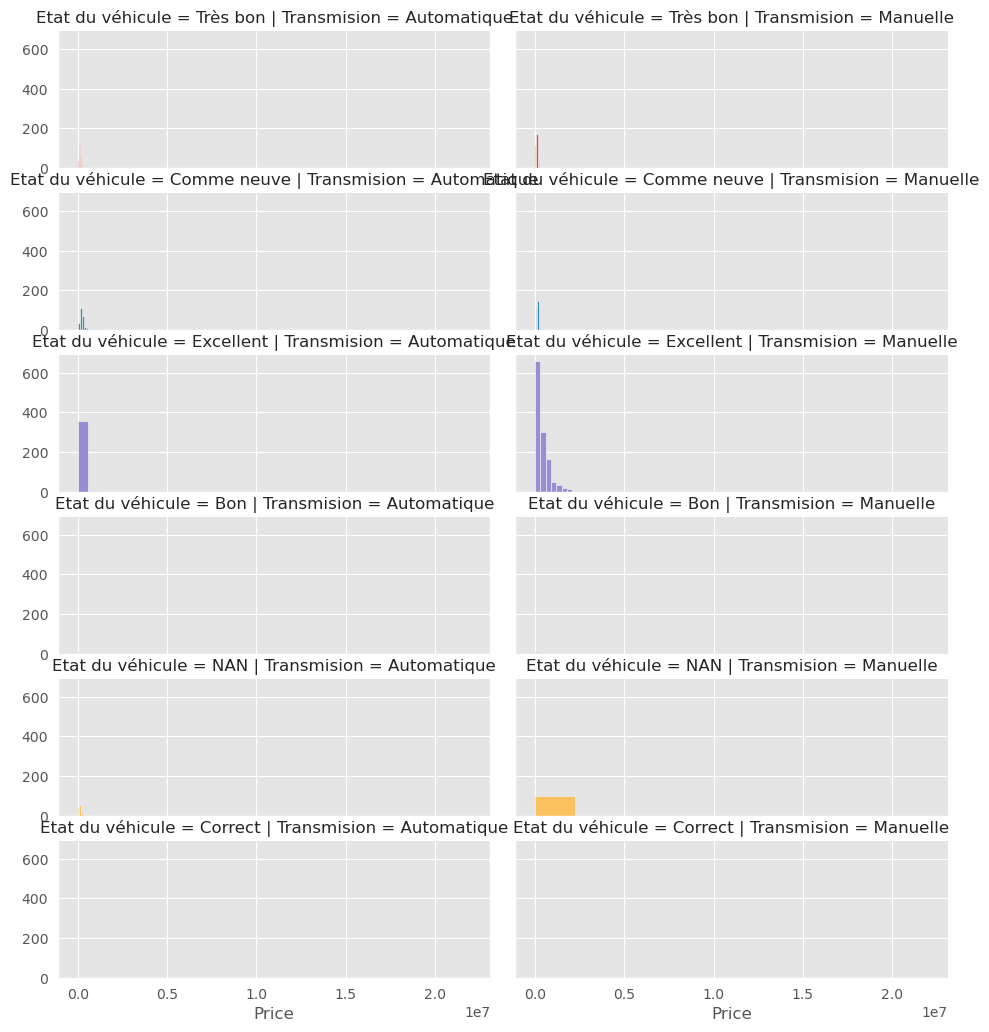

In [227]:
'''
Utilisation de la variable 'Price' pour tracer un histogramme de la 
distribution des prix des véhicules pour chaque combinaison unique des valeurs de Etat du 
véhicule et Transmision.
'''
g = sns.FacetGrid(cars_dataset, row='Etat du véhicule', col='Transmision',hue="Etat du véhicule") # we created grid to populate our figure in it
g = g.map(plt.hist,'Price')
g.fig.set_size_inches(10, 10)

### Build dashboard


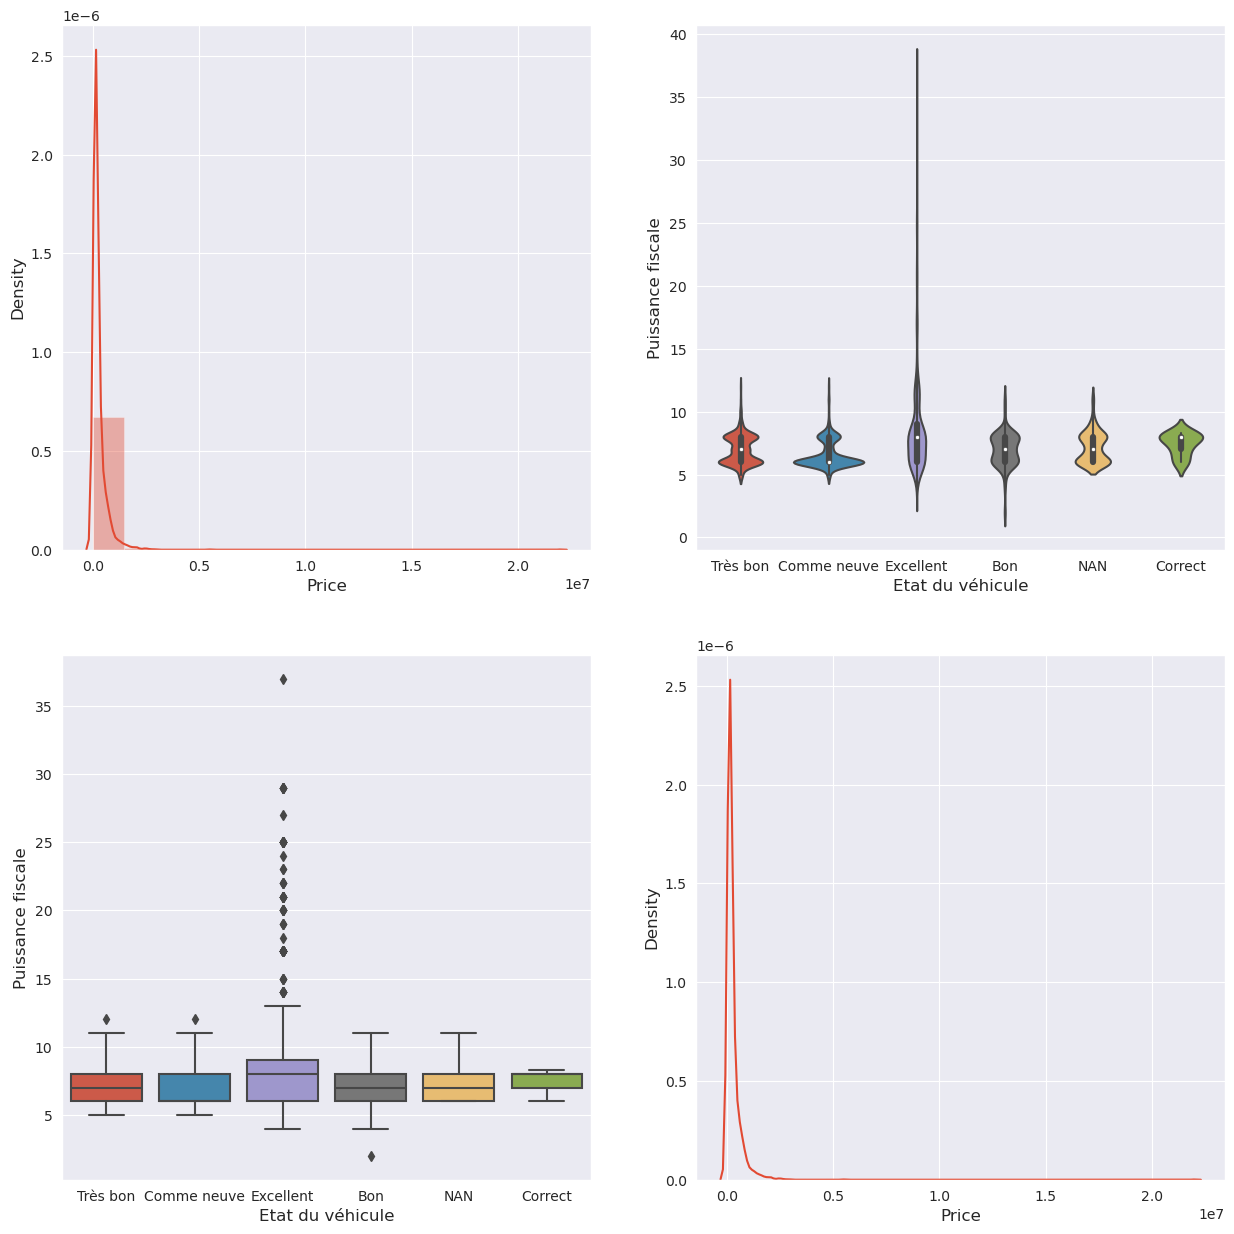

In [228]:
'''
On crée une figure de dimension 2x2 avec plt.subplots(2,2,figsize=(15,15)), 
en stockant les axes dans la variable axes.

La première figure (k1) est un histogramme de la distribution des prix des voitures 
(Price) avec sns.distplot(), en utilisant bins=15 pour diviser l'axe x en 15 bins.

La deuxième figure (z) est un violonplot qui montre la distribution de la puissance 
fiscale (Puissance fiscale) en fonction de l'état du véhicule (Etat du véhicule) pour 
les voitures avec transmission manuelle (Transmision=="Manuelle").

La troisième figure (k3) est un boxplot qui montre la répartition de la puissance 
fiscale (Puissance fiscale) en fonction de l'état du véhicule (Etat du véhicule) pour 
les voitures avec transmission manuelle (Transmision=="Manuelle"). La deuxième partie 
de cette figure (k3b) est une estimation de la densité de la distribution des prix des
voitures (Price) avec sns.kdeplot().

En somme, on crée une figure avec 4 sous-graphiques différents pour explorer 
différentes caractéristiques des données du jeu de données.
'''
sns.set_style('darkgrid') 
f, axes = plt.subplots(2,2,figsize=(15,15))  

#fig 1
k1= sns.distplot(cars_dataset.Price, bins=15, ax=axes[0,0])
#fig 2
z= sns.violinplot(data= cars_dataset[cars_dataset.Transmision=="Manuelle"], x="Etat du véhicule" , y="Puissance fiscale",ax=axes[0,1])

# fig 3
k3= sns.boxplot(data= cars_dataset[cars_dataset.Transmision=="Manuelle"], x="Etat du véhicule" , y="Puissance fiscale",ax=axes[1,0])
k3b= sns.kdeplot(cars_dataset.Price,ax=axes[1,1])

In [229]:
cars_dataset.head(5)



,Brand,Model,Version,Price,Year,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,MERCEDES,Classe C,220 d,228000.0,2014.0,Seconde,144500.0,Diesel,Automatique,8.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
1,MERCEDES,Classe C,220 CDI,79000.0,2003.0,Seconde,350000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
2,MERCEDES,Classe B,180 d Urban,150000.0,2013.0,Seconde,144000.0,Diesel,Manuelle,8.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
3,MERCEDES,Classe E,Autre version,135000.0,2006.0,Seconde,248000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228
4,MERCEDES,CLA Coupé,220 CDI,240000.0,2014.0,Seconde,103000.0,Diesel,Automatique,9.0,...,oui,oui,oui,oui,4 cylindres,2004.078107,52.62552,41.377437,208.546729,57.662228


In [230]:
cars_dataset['Ordinateur de bord'].unique()


array(['oui', 'non'], dtype=object)

# Dataset labeling


In [231]:
# Here we will label categorical columns to be numerical values
from sklearn.preprocessing import LabelEncoder
columns_to_label=['Brand','Model','Version','Main','Transmision','Antipatinage','Architecture','Carburant','Etat du véhicule','Couleur extérieure','Climatisation','Vitres électriques','Sièges électriques','Sièges électriques','Ordinateur de bord','Start & Stop','Régulateur de vitesse','Allumage auto. des feux','Détecteur de pluie','Commandes au volant','Ecran tactile','Rétroviseurs électriques','Ouverture auto. du coffre','Démarrage mains libres','Banquette arrière rabattable 1/3-2/3','Caméra de recul','Bluetooth','Jantes aluminium','Volant cuir','Feux de jour','Barres de toit','Toit','Airbags','ABS','ESP','Cylindrée','Conso. ville','Conso. route','Vitesse maxi.']
for column_name in columns_to_label:
    # create an instance of LabelEncoder
    le = LabelEncoder()
    # fit and transform the column containing categorical values
    cars_dataset[column_name] = le.fit_transform(cars_dataset[column_name])
cars_dataset.head(15)



,Brand,Model,Version,Price,Year,Main,Kilométrage,Carburant,Transmision,Puissance fiscale,...,Airbags,ABS,ESP,Antipatinage,Architecture,Cylindrée,Conso. ville,Conso. route,Vitesse maxi.,Volume du réservoir
0,18,68,639,228000.0,2014.0,1,144500.0,0,0,8.0,...,10,1,1,1,3,37,25,17,50,57.662228
1,18,68,634,79000.0,2003.0,1,350000.0,0,1,8.0,...,10,1,1,1,3,37,25,17,50,57.662228
2,18,66,406,150000.0,2013.0,1,144000.0,0,1,8.0,...,10,1,1,1,3,37,25,17,50,57.662228
3,18,72,704,135000.0,2006.0,1,248000.0,0,0,9.0,...,10,1,1,1,3,37,25,17,50,57.662228
4,18,43,634,240000.0,2014.0,1,103000.0,0,0,9.0,...,10,1,1,1,3,37,25,17,50,57.662228
5,18,72,652,150000.0,2010.0,1,169950.0,0,0,9.0,...,10,1,1,1,3,37,25,17,50,57.662228
6,18,72,648,580000.0,2016.0,1,18000.0,0,0,8.0,...,10,1,1,1,3,37,25,17,50,57.662228
7,18,68,631,228000.0,2013.0,0,155000.0,0,0,9.0,...,10,1,1,1,3,37,25,17,50,57.662228
8,18,126,633,290000.0,2017.0,0,67271.0,0,0,9.0,...,10,1,1,1,3,37,25,17,50,57.662228
9,18,43,623,240000.0,2014.0,1,87000.0,0,1,6.0,...,10,1,1,1,3,37,25,17,50,57.662228


## Prediction


To build a model ,In first step we will use linear regression on remaining feature ,In second step we will apply feature selection using the SelectKBest method with f_regression score function to select the top k features. We then trained the model on the selected features and evaluated its performance on the testing set using mean squared error and R-squared metrics.

        - R-squared ranges from 0 to 1, with a higher value indicating a better fit between the model and the data .
        - MSE measures the average squared difference between the predicted values and the actual values  with a lower value indicating a better prediction.


#### Model with remaining feature


In [267]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Load and clean the dataset

cars_dataset = cars_dataset.dropna()
cars_dataset = cars_dataset.drop_duplicates()
cars_dataset = pd.get_dummies(cars_dataset)

# Split the dataset into training and testing sets
y = cars_dataset['Price']
X = cars_dataset.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and train it

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared: ", r2)


Mean squared error:  35910117081.319916
R-squared:  0.6178957426904589


#### Model with Feature selection
 
Now, we will apply feature selection using different number of features (k) then we will represent diffirent R2 and MSE ,then we can chose a value of K where r2 is higher enough and where  MSE is lower enough .

In [286]:

# Load and clean the dataset

cars_dataset = cars_dataset.dropna()
cars_dataset = cars_dataset.drop_duplicates()
cars_dataset = pd.get_dummies(cars_dataset)

    # Split the dataset into training and testing sets
mses=[]
r2s=[]
y = cars_dataset['Price']
X = cars_dataset.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
    # Define the model and train it
for k in range(1,31):
        selector = SelectKBest(f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        model.fit(X_train_selected, y_train)

        # Evaluate the model

        X_test_selected = selector.transform(X_test)
        y_pred = model.predict(X_test_selected)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mses.append(mse)
        r2s.append(r2)


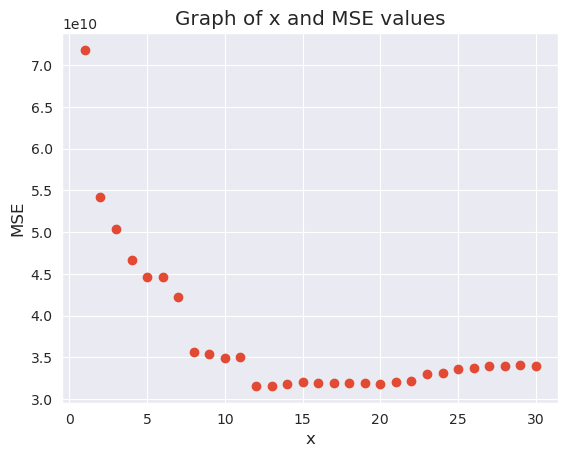

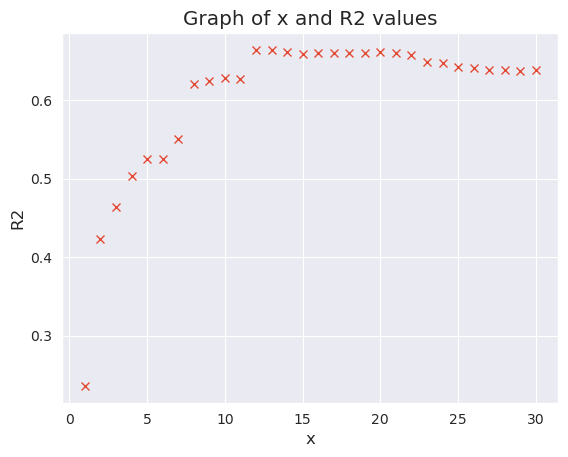

In [294]:
import matplotlib.pyplot as plt

# Define x values using range(8, 30)
x = range(1,31)

# Plot MSE values
plt.plot(x, mses, 'o')
plt.xlabel('x')
plt.ylabel('MSE')
plt.title('Graph of x and MSE values')
plt.show()

# Plot R2 values
plt.plot(x, r2s, 'x')
plt.xlabel('x')
plt.ylabel('R2')
plt.title('Graph of x and R2 values')
plt.show()


We notice that for k=12 ,r2 is higher and mse is lower,next code we build the model with 12 best selected features  with 

In [295]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Load and clean the dataset

cars_dataset = cars_dataset.dropna()
cars_dataset = cars_dataset.drop_duplicates()
cars_dataset = pd.get_dummies(cars_dataset)

# Split the dataset into training and testing sets

y = cars_dataset['Price']
X = cars_dataset.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and train it

model = LinearRegression()
selector = SelectKBest(f_regression, k=12)
X_train_selected = selector.fit_transform(X_train, y_train)
model.fit(X_train_selected, y_train)

# Evaluate the model

X_test_selected = selector.transform(X_test)
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The best metrics :\n----------Mean squared error: ", mse)
print("----------R-squared: ", r2)


The best metrics :
----------Mean squared error:  31606071310.871227
----------R-squared:  0.6636932601092775
